<a href="https://colab.research.google.com/github/InowaR/colab/blob/main/derivative_polynomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random

# Данные для XOR
X = [[0, 0], [0, 1], [1, 0], [1, 1]]
y_true = [0, 1, 1, 0]

# Случайные начальные коэффициенты
w0, w1, w2, w3 = [random.uniform(-1, 1) for _ in range(4)]

# Гиперпараметры
learning_rate = 0.1
epochs = 1000

# Обучение
for epoch in range(epochs):
    total_error = 0
    for i in range(len(X)):
        x1, x2 = X[i]
        target = y_true[i]

        # Прямой проход
        y_pred = w0 + w1*x1 + w2*x2 + w3*x1*x2

        # Ошибка
        error = y_pred - target
        total_error += error**2

        # Градиенты (производные)
        dw0 = error
        dw1 = error * x1
        dw2 = error * x2
        dw3 = error * x1*x2

        # Обновление весов
        w0 -= learning_rate * dw0
        w1 -= learning_rate * dw1
        w2 -= learning_rate * dw2
        w3 -= learning_rate * dw3

    # Вывод ошибки каждые 100 эпох
    if epoch % 100 == 0:
        print(f"Эпоха {epoch}, Ошибка: {total_error:.4f}")

# Проверка
print("\nРезультаты после обучения:")
for x1, x2 in X:
    y = w0 + w1*x1 + w2*x2 + w3*x1*x2
    print(f"{x1} XOR {x2} = {int(round(y))} (точное значение: {y:.4f})")

print(f"\nИтоговое уравнение:")
print(f"y = {w0:.4f} + {w1:.4f}*x1 + {w2:.4f}*x2 + {w3:.4f}*x1*x2")

Эпоха 0, Ошибка: 6.9273
Эпоха 100, Ошибка: 0.0482
Эпоха 200, Ошибка: 0.0020
Эпоха 300, Ошибка: 0.0001
Эпоха 400, Ошибка: 0.0000
Эпоха 500, Ошибка: 0.0000
Эпоха 600, Ошибка: 0.0000
Эпоха 700, Ошибка: 0.0000
Эпоха 800, Ошибка: 0.0000
Эпоха 900, Ошибка: 0.0000

Результаты после обучения:
0 XOR 0 = 0 (точное значение: 0.0000)
0 XOR 1 = 1 (точное значение: 1.0000)
1 XOR 0 = 1 (точное значение: 1.0000)
1 XOR 1 = 0 (точное значение: 0.0000)

Итоговое уравнение:
y = 0.0000 + 1.0000*x1 + 1.0000*x2 + -2.0000*x1*x2


In [ ]:
import random

# Новые данные: 4 элемента по 3 значения во входе и 3 значения в выходе
X = [
    [0, 0, 0],
    [0, 0, 1],
    [0, 1, 0],
    [1, 0, 0]
]
y_true = [
    [0, 0, 0],
    [0, 1, 1],
    [0, 1, 1],
    [1, 0, 1]
]

# Полиномиальное уравнение для каждого выхода (y1, y2, y3):
# y1 = w0 + w1*x1 + w2*x2 + w3*x3 + w4*x1*x2 + w5*x1*x3 + w6*x2*x3 + w7*x1*x2*x3
# y2 = ... (аналогично)
# y3 = ... (аналогично)

# Инициализация весов (по 8 коэффициентов на каждый выход)
weights = [
    [random.uniform(-1, 1) for _ in range(8)],  # Для y1
    [random.uniform(-1, 1) for _ in range(8)],   # Для y2
    [random.uniform(-1, 1) for _ in range(8)]    # Для y3
]

learning_rate = 0.01
epochs = 5000

def compute_polynomial(x, coeffs):
    """Вычисляет значение полинома для одного выхода"""
    x1, x2, x3 = x
    return (
        coeffs[0] +
        coeffs[1]*x1 + coeffs[2]*x2 + coeffs[3]*x3 +
        coeffs[4]*x1*x2 + coeffs[5]*x1*x3 + coeffs[6]*x2*x3 +
        coeffs[7]*x1*x2*x3
    )

# Обучение
for epoch in range(epochs):
    total_error = 0
    for i in range(len(X)):
        x = X[i]
        targets = y_true[i]

        # Прямой проход для всех 3 выходов
        predictions = [
            compute_polynomial(x, weights[0]),  # y1
            compute_polynomial(x, weights[1]),  # y2
            compute_polynomial(x, weights[2])   # y3
        ]

        # Обновление весов для каждого выхода
        for j in range(3):
            error = predictions[j] - targets[j]
            total_error += error**2

            # Градиенты для каждого члена полинома
            x1, x2, x3 = x
            gradients = [
                1,                  # для w0 (константа)
                x1,                 # для w1
                x2,                 # для w2
                x3,                 # для w3
                x1*x2,              # для w4
                x1*x3,              # для w5
                x2*x3,              # для w6
                x1*x2*x3            # для w7
            ]

            # Обновление весов
            for k in range(8):
                weights[j][k] -= learning_rate * error * gradients[k]

    if epoch % 500 == 0:
        print(f"Эпоха {epoch}, Ошибка: {total_error:.6f}")

# Проверка
print("\nРезультаты:")
print("Вход -> Предсказание (Истинное значение)")
for i in range(len(X)):
    x = X[i]
    pred = [
        compute_polynomial(x, weights[0]),
        compute_polynomial(x, weights[1]),
        compute_polynomial(x, weights[2])
    ]
    print(f"{x} -> {[round(p, 4) for p in pred]} ({y_true[i]})")

# Вывод уравнений
print("\nУравнения:")
for j in range(3):
    print(f"y{j+1} = {weights[j][0]:.4f} + {weights[j][1]:.4f}*x1 + {weights[j][2]:.4f}*x2 + {weights[j][3]:.4f}*x3 + "
          f"{weights[j][4]:.4f}*x1*x2 + {weights[j][5]:.4f}*x1*x3 + {weights[j][6]:.4f}*x2*x3 + {weights[j][7]:.4f}*x1*x2*x3")

Эпоха 0, Ошибка: 5.278492
Эпоха 500, Ошибка: 0.264155
Эпоха 1000, Ошибка: 0.032357
Эпоха 1500, Ошибка: 0.003965
Эпоха 2000, Ошибка: 0.000486
Эпоха 2500, Ошибка: 0.000060
Эпоха 3000, Ошибка: 0.000007
Эпоха 3500, Ошибка: 0.000001
Эпоха 4000, Ошибка: 0.000000
Эпоха 4500, Ошибка: 0.000000

Результаты:
Вход -> Предсказание (Истинное значение)
[0, 0, 0] -> [0.0, 0.0, 0.0] ([0, 0, 0])
[0, 0, 1] -> [-0.0, 1.0, 1.0] ([0, 1, 1])
[0, 1, 0] -> [-0.0, 1.0, 1.0] ([0, 1, 1])
[1, 0, 0] -> [1.0, -0.0, 1.0] ([1, 0, 1])

Уравнения:
y1 = 0.0000 + 1.0000*x1 + -0.0000*x2 + -0.0000*x3 + -0.6582*x1*x2 + -0.1507*x1*x3 + -0.0894*x2*x3 + -0.7711*x1*x2*x3
y2 = 0.0000 + -0.0000*x1 + 1.0000*x2 + 1.0000*x3 + -0.0562*x1*x2 + 0.5116*x1*x3 + 0.1692*x2*x3 + 0.7334*x1*x2*x3
y3 = 0.0000 + 1.0000*x1 + 1.0000*x2 + 1.0000*x3 + -0.4218*x1*x2 + -0.0178*x1*x3 + 0.8665*x2*x3 + 0.5136*x1*x2*x3


In [ ]:
import random

# Данные: 4 элемента по 3 значения во входе и 3 значения в выходе
X = [
    [0, 0, 0],
    [0, 0, 1],
    [0, 1, 0],
    [1, 0, 0]
]
y_true = [
    [0, 0, 0],
    [0, 1, 1],
    [0, 1, 1],
    [1, 0, 1]
]

# Полиномиальное уравнение с квадратами для каждого выхода (y1, y2, y3):
# y = w0 + w1*x1 + w2*x2 + w3*x3 +
#     w4*x1² + w5*x2² + w6*x3² +
#     w7*x1*x2 + w8*x1*x3 + w9*x2*x3 +
#     w10*x1*x2*x3

# Инициализация весов (по 11 коэффициентов на каждый выход)
weights = [
    [random.uniform(-0.5, 0.5) for _ in range(11)],  # Для y1
    [random.uniform(-0.5, 0.5) for _ in range(11)],   # Для y2
    [random.uniform(-0.5, 0.5) for _ in range(11)]    # Для y3
]

learning_rate = 0.01
epochs = 10000

def compute_polynomial(x, coeffs):
    """Вычисляет значение полинома для одного выхода"""
    x1, x2, x3 = x
    return (
        coeffs[0] +
        coeffs[1]*x1 + coeffs[2]*x2 + coeffs[3]*x3 +
        coeffs[4]*x1**2 + coeffs[5]*x2**2 + coeffs[6]*x3**2 +
        coeffs[7]*x1*x2 + coeffs[8]*x1*x3 + coeffs[9]*x2*x3 +
        coeffs[10]*x1*x2*x3
    )

# Обучение
for epoch in range(epochs):
    total_error = 0
    for i in range(len(X)):
        x = X[i]
        targets = y_true[i]

        predictions = [
            compute_polynomial(x, weights[0]),  # y1
            compute_polynomial(x, weights[1]),  # y2
            compute_polynomial(x, weights[2])   # y3
        ]

        for j in range(3):
            error = predictions[j] - targets[j]
            total_error += error**2

            x1, x2, x3 = x
            gradients = [
                1,          # w0
                x1,         # w1
                x2,         # w2
                x3,         # w3
                x1**2,      # w4
                x2**2,      # w5
                x3**2,      # w6
                x1*x2,      # w7
                x1*x3,      # w8
                x2*x3,      # w9
                x1*x2*x3    # w10
            ]

            for k in range(11):
                weights[j][k] -= learning_rate * error * gradients[k]

    if epoch % 1000 == 0:
        print(f"Эпоха {epoch}, Ошибка: {total_error:.6f}")

# Проверка
print("\nРезультаты:")
print("Вход -> Предсказание (Истинное значение)")
for i in range(len(X)):
    x = X[i]
    pred = [compute_polynomial(x, weights[j]) for j in range(3)]
    print(f"{x} -> {[round(p, 4) for p in pred]} ({y_true[i]})")

# Вывод уравнений
print("\nУравнения (округлены до 4 знаков):")
for j in range(3):
    eq = f"y{j+1} = {weights[j][0]:.4f} + {weights[j][1]:.4f}*x1 + {weights[j][2]:.4f}*x2 + {weights[j][3]:.4f}*x3 + "
    eq += f"{weights[j][4]:.4f}*x1² + {weights[j][5]:.4f}*x2² + {weights[j][6]:.4f}*x3² + "
    eq += f"{weights[j][7]:.4f}*x1x2 + {weights[j][8]:.4f}*x1x3 + {weights[j][9]:.4f}*x2x3 + "
    eq += f"{weights[j][10]:.4f}*x1x2x3"
    print(eq)

Эпоха 0, Ошибка: 7.330569
Эпоха 1000, Ошибка: 0.000409
Эпоха 2000, Ошибка: 0.000000
Эпоха 3000, Ошибка: 0.000000
Эпоха 4000, Ошибка: 0.000000
Эпоха 5000, Ошибка: 0.000000
Эпоха 6000, Ошибка: 0.000000
Эпоха 7000, Ошибка: 0.000000
Эпоха 8000, Ошибка: 0.000000
Эпоха 9000, Ошибка: 0.000000

Результаты:
Вход -> Предсказание (Истинное значение)
[0, 0, 0] -> [0.0, 0.0, 0.0] ([0, 0, 0])
[0, 0, 1] -> [-0.0, 1.0, 1.0] ([0, 1, 1])
[0, 1, 0] -> [-0.0, 1.0, 1.0] ([0, 1, 1])
[1, 0, 0] -> [1.0, -0.0, 1.0] ([1, 0, 1])

Уравнения (округлены до 4 знаков):
y1 = 0.0000 + 0.6294*x1 + -0.0833*x2 + 0.2115*x3 + 0.3706*x1² + 0.0833*x2² + -0.2115*x3² + -0.4622*x1x2 + 0.2535*x1x3 + 0.0434*x2x3 + 0.4786*x1x2x3
y2 = 0.0000 + 0.1654*x1 + 0.7632*x2 + 0.6723*x3 + -0.1654*x1² + 0.2368*x2² + 0.3277*x3² + 0.0116*x1x2 + -0.3361*x1x3 + 0.2356*x2x3 + -0.4147*x1x2x3
y3 = 0.0000 + 0.6410*x1 + 0.6227*x2 + 0.7754*x3 + 0.3590*x1² + 0.3773*x2² + 0.2246*x3² + -0.0992*x1x2 + 0.2224*x1x3 + -0.3222*x2x3 + -0.1194*x1x2x3


In [ ]:
import random

# Данные: 4 элемента по 2 значения во входе и 3 значения в выходе
X = [
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
]
y_true = [
    [0, 0, 0],
    [0, 1, 1],
    [0, 1, 1],
    [1, 0, 1]
]

# Полиномиальное уравнение с квадратами для каждого выхода (y1, y2, y3):
# y = w0 + w1*x1 + w2*x2 +
#     w3*x1² + w4*x2² +
#     w5*x1*x2 +
#     w6*x1²*x2 + w7*x1*x2² +
#     w8*x1²*x2²

# Инициализация весов (по 9 коэффициентов на каждый выход)
weights = [
    [random.uniform(-0.5, 0.5) for _ in range(9)],  # Для y1
    [random.uniform(-0.5, 0.5) for _ in range(9)],  # Для y2
    [random.uniform(-0.5, 0.5) for _ in range(9)]   # Для y3
]

learning_rate = 0.01
epochs = 10000

def compute_polynomial(x, coeffs):
    """Вычисляет значение полинома для одного выхода"""
    x1, x2 = x
    return (
        coeffs[0] +
        coeffs[1]*x1 + coeffs[2]*x2 +
        coeffs[3]*x1**2 + coeffs[4]*x2**2 +
        coeffs[5]*x1*x2 +
        coeffs[6]*x1**2*x2 + coeffs[7]*x1*x2**2 +
        coeffs[8]*x1**2*x2**2
    )

# Обучение
for epoch in range(epochs):
    total_error = 0
    for i in range(len(X)):
        x = X[i]
        targets = y_true[i]

        predictions = [
            compute_polynomial(x, weights[0]),  # y1
            compute_polynomial(x, weights[1]),  # y2
            compute_polynomial(x, weights[2])   # y3
        ]

        for j in range(3):
            error = predictions[j] - targets[j]
            total_error += error**2

            x1, x2 = x
            gradients = [
                1,              # w0
                x1,            # w1
                x2,            # w2
                x1**2,         # w3
                x2**2,         # w4
                x1*x2,         # w5
                x1**2*x2,      # w6
                x1*x2**2,      # w7
                x1**2*x2**2    # w8
            ]

            for k in range(9):
                weights[j][k] -= learning_rate * error * gradients[k]

    if epoch % 1000 == 0:
        print(f"Эпоха {epoch}, Ошибка: {total_error:.6f}")

# Проверка на обучающей выборке
print("\nРезультаты на обучающей выборке:")
print("Вход -> Предсказание (Истинное значение)")
for i in range(len(X)):
    x = X[i]
    pred = [compute_polynomial(x, weights[j]) for j in range(3)]
    print(f"{x} -> {[round(p, 4) for p in pred]} ({y_true[i]})")

# Проверка на новом примере, которого не было в обучающей выборке
new_x = [0.5, 0.5]
new_pred = [compute_polynomial(new_x, weights[j]) for j in range(3)]
print(f"\nПроверка на новом входе {new_x}:")
print(f"Предсказание: {[round(p, 4) for p in new_pred]}")

# Вывод уравнений
print("\nУравнения (округлены до 4 знаков):")
for j in range(3):
    eq = f"y{j+1} = {weights[j][0]:.4f} + {weights[j][1]:.4f}*x1 + {weights[j][2]:.4f}*x2 + "
    eq += f"{weights[j][3]:.4f}*x1² + {weights[j][4]:.4f}*x2² + "
    eq += f"{weights[j][5]:.4f}*x1x2 + "
    eq += f"{weights[j][6]:.4f}*x1²x2 + {weights[j][7]:.4f}*x1x2² + "
    eq += f"{weights[j][8]:.4f}*x1²x2²"
    print(eq)

Эпоха 0, Ошибка: 14.262752
Эпоха 1000, Ошибка: 0.001102
Эпоха 2000, Ошибка: 0.000001
Эпоха 3000, Ошибка: 0.000000
Эпоха 4000, Ошибка: 0.000000
Эпоха 5000, Ошибка: 0.000000
Эпоха 6000, Ошибка: 0.000000
Эпоха 7000, Ошибка: 0.000000
Эпоха 8000, Ошибка: 0.000000
Эпоха 9000, Ошибка: 0.000000

Результаты на обучающей выборке:
Вход -> Предсказание (Истинное значение)
[0, 0] -> [-0.0, 0.0, 0.0] ([0, 0, 0])
[0, 1] -> [0.0, 1.0, 1.0] ([0, 1, 1])
[1, 0] -> [0.0, 1.0, 1.0] ([0, 1, 1])
[1, 1] -> [1.0, 0.0, 1.0] ([1, 0, 1])

Проверка на новом входе [0.5, 0.5]:
Предсказание: [0.1892, 0.5137, 0.5905]

Уравнения (округлены до 4 знаков):
y1 = -0.0000 + 0.2810*x1 + -0.0484*x2 + -0.2810*x1² + 0.0484*x2² + 0.1353*x1x2 + 0.1521*x1²x2 + 0.5379*x1x2² + 0.1747*x1²x2²
y2 = 0.0000 + 0.5397*x1 + 0.7569*x2 + 0.4603*x1² + 0.2431*x2² + -0.5962*x1x2 + -0.3281*x1²x2 + -0.8510*x1x2² + -0.2247*x1²x2²
y3 = 0.0000 + 0.4018*x1 + 0.5028*x2 + 0.5982*x1² + 0.4972*x2² + -0.1790*x1x2 + -0.6719*x1²x2 + 0.0393*x1x2² + -0.1885*x1²

In [ ]:
import numpy as np

# Генерация и нормализация данных
X = np.array([[i, i+1] for i in range(1, 11)], dtype=np.float64)
y = np.array([np.mean(x) for x in X], dtype=np.float64)

# Нормализация данных (приведем к диапазону ~[0, 1])
X_normalized = X / np.max(X)
y_normalized = y / np.max(y)

# Тестовый пример (нормализованный)
test_x = np.array([11, 12], dtype=np.float64)
test_x_normalized = test_x / np.max(X)
true_test_y = np.mean(test_x)

# Полиномиальное уравнение с расширенными членами
weights = np.random.uniform(-0.01, 0.01, size=10)  # Меньший диапазон весов

learning_rate = 0.001  # Уменьшенный learning rate
epochs = 50000

def compute_polynomial(x, coeffs):
    x1, x2 = x
    return (
        coeffs[0] +
        coeffs[1]*x1 + coeffs[2]*x2 +
        coeffs[3]*x1**2 + coeffs[4]*x2**2 +
        coeffs[5]*x1*x2 +
        coeffs[6]*x1**3 + coeffs[7]*x2**3 +
        coeffs[8]*x1**2*x2 + coeffs[9]*x1*x2**2
    )

# Обучение с контролем переполнения
for epoch in range(epochs):
    total_error = 0
    for i in range(len(X_normalized)):
        x = X_normalized[i]
        target = y_normalized[i]

        prediction = compute_polynomial(x, weights)
        error = prediction - target
        total_error += error**2

        x1, x2 = x
        gradients = np.array([
            1, x1, x2,
            x1**2, x2**2, x1*x2,
            x1**3, x2**3,
            x1**2*x2, x1*x2**2
        ], dtype=np.float64)

        # Обновление весов с проверкой на конечность значений
        if np.isfinite(error):
            weights -= learning_rate * error * gradients
        else:
            print("Обнаружено переполнение, сброс весов")
            weights = np.random.uniform(-0.01, 0.01, size=10)
            break

    if not np.isfinite(total_error):
        print("Обнаружено переполнение, сброс весов")
        weights = np.random.uniform(-0.01, 0.01, size=10)
        continue

    if epoch % 5000 == 0:
        print(f"Эпоха {epoch}, Ошибка: {total_error:.10f}")

# Денормализация предсказаний
def denormalize_prediction(pred, max_y):
    return pred * max_y

max_y = np.max(y)

# Проверка на обучающей выборке
print("\nРезультаты на обучающей выборке:")
print("Вход -> Предсказание (Истинное значение) | Разница")
for i in range(len(X_normalized)):
    x = X_normalized[i]
    pred_normalized = compute_polynomial(x, weights)
    pred = denormalize_prediction(pred_normalized, max_y)
    true_val = y[i]
    diff = pred - true_val
    print(f"{X[i]} -> {pred:.8f} ({true_val}) | {diff:.8f}")

# Предсказание для тестового примера
test_pred_normalized = compute_polynomial(test_x_normalized, weights)
test_pred = denormalize_prediction(test_pred_normalized, max_y)
print(f"\nТестовый пример {test_x}:")
print(f"Предсказание: {test_pred:.8f}")
print(f"Истинное значение: {true_test_y}")
print(f"Разница: {test_pred - true_test_y:.8f}")

# Вывод уравнения (для нормализованных данных)
print("\nУравнение для нормализованных данных:")
terms = ["", "*x1", "*x2", "*x1²", "*x2²", "*x1*x2", "*x1³", "*x2³", "*x1²*x2", "*x1*x2²"]
equation = "y_normalized = " + " + ".join([f"{weights[i]:.6f}{terms[i]}" for i in range(10)])
print(equation)

Эпоха 0, Ошибка: 3.7769970273
Эпоха 5000, Ошибка: 0.0103144561
Эпоха 10000, Ошибка: 0.0034735729
Эпоха 15000, Ошибка: 0.0012278524
Эпоха 20000, Ошибка: 0.0004898705
Эпоха 25000, Ошибка: 0.0002466348
Эпоха 30000, Ошибка: 0.0001657678
Эпоха 35000, Ошибка: 0.0001382048
Эпоха 40000, Ошибка: 0.0001281539
Эпоха 45000, Ошибка: 0.0001238670

Результаты на обучающей выборке:
Вход -> Предсказание (Истинное значение) | Разница
[1. 2.] -> 1.56580435 (1.5) | 0.06580435
[2. 3.] -> 2.48867938 (2.5) | -0.01132062
[3. 4.] -> 3.45634201 (3.5) | -0.04365799
[4. 5.] -> 4.45659926 (4.5) | -0.04340074
[5. 6.] -> 5.47725818 (5.5) | -0.02274182
[6. 7.] -> 6.50612582 (6.5) | 0.00612582
[7. 8.] -> 7.53100922 (7.5) | 0.03100922
[8. 9.] -> 8.53971541 (8.5) | 0.03971541
[ 9. 10.] -> 9.52005144 (9.5) | 0.02005144
[10. 11.] -> 10.45982434 (10.5) | -0.04017566

Тестовый пример [11. 12.]:
Предсказание: 11.34684117
Истинное значение: 11.5
Разница: -0.15315883

Уравнение для нормализованных данных:
y_normalized = 0.0272

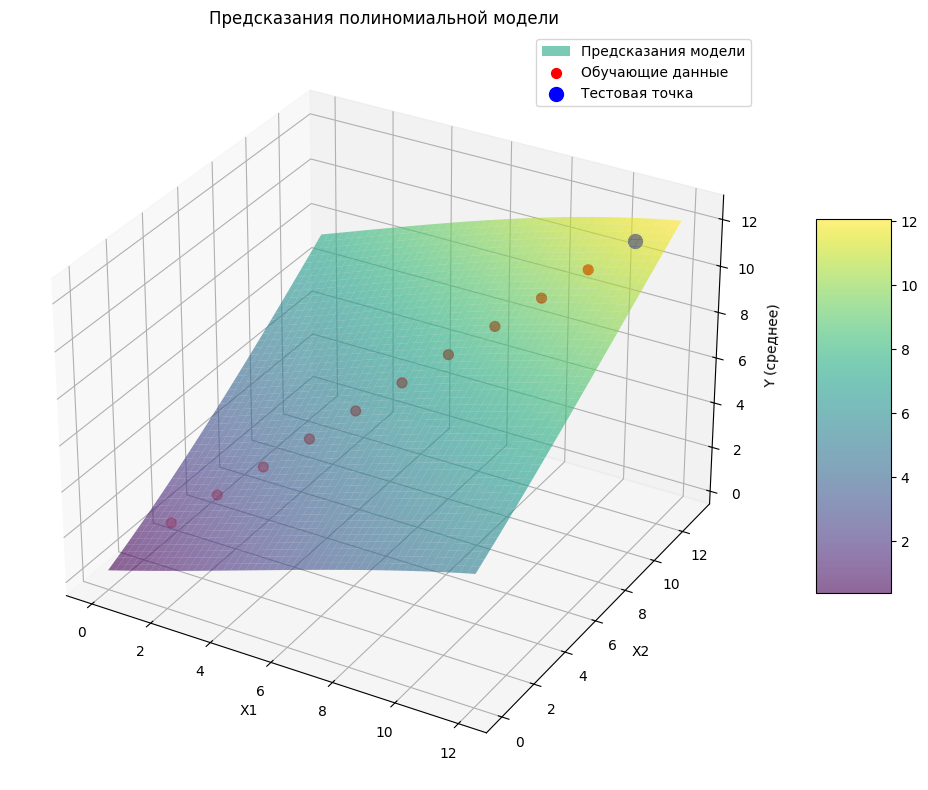

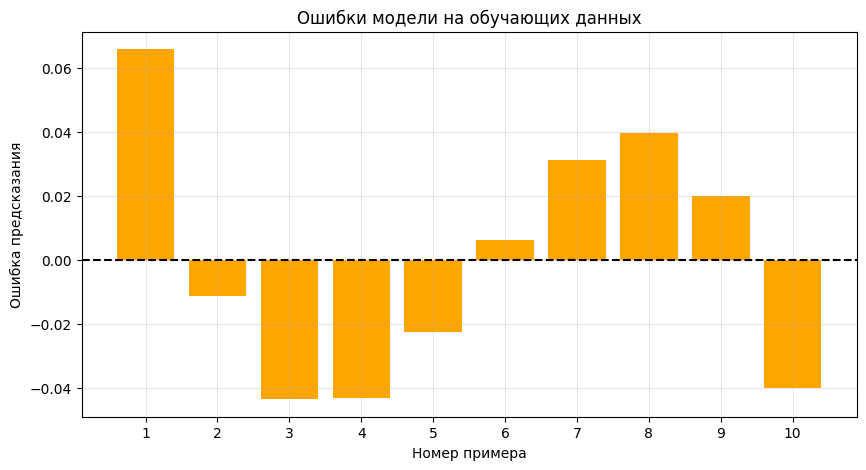

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Создаем сетку для предсказаний
x1_range = np.linspace(0, 12, 50)
x2_range = np.linspace(0, 13, 50)
X1, X2 = np.meshgrid(x1_range, x2_range)

# Нормализуем сетку как обучающие данные
X1_normalized = X1 / np.max(X)
X2_normalized = X2 / np.max(X)

# Вычисляем предсказания для всех точек сетки
Z_normalized = np.zeros_like(X1)
for i in range(X1.shape[0]):
    for j in range(X1.shape[1]):
        Z_normalized[i,j] = compute_polynomial([X1_normalized[i,j], X2_normalized[i,j]], weights)

# Денормализуем предсказания
Z = Z_normalized * np.max(y)

# Создаем 3D-график
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Поверхность предсказаний
surf = ax.plot_surface(X1, X2, Z, cmap='viridis', alpha=0.6, label='Предсказания модели')

# Обучающие точки (денормализованные)
ax.scatter(X[:,0], X[:,1], y, color='red', s=50, label='Обучающие данные')

# Тестовая точка
ax.scatter([test_x[0]], [test_x[1]], [true_test_y], color='blue', s=100, label='Тестовая точка')

# Настройки графика
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y (среднее)')
ax.set_title('Предсказания полиномиальной модели')
ax.legend()

# Добавим цветовую шкалу
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.tight_layout()
plt.show()

# Дополнительно: график ошибок на обучающих данных
preds = [denormalize_prediction(compute_polynomial(x, weights), np.max(y)) for x in X_normalized]
errors = np.array(preds) - y

plt.figure(figsize=(10, 5))
plt.bar(range(len(X)), errors, color='orange')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Номер примера')
plt.ylabel('Ошибка предсказания')
plt.title('Ошибки модели на обучающих данных')
plt.xticks(range(len(X)), range(1, len(X)+1))
plt.grid(True, alpha=0.3)
plt.show()

In [20]:
import numpy as np

# Генерация и нормализация данных
X = np.array([[i, i+1] for i in range(1, 11)], dtype=np.float64)
y = np.array([np.mean(x) for x in X], dtype=np.float64)

# Нормализация данных
X_normalized = X / np.max(X)
y_normalized = y / np.max(y)

# Тестовый пример
test_x = np.array([11, 12], dtype=np.float64)
test_x_normalized = test_x / np.max(X)
true_test_y = np.mean(test_x)
max_y = np.max(y)

# Гиперпараметры
learning_rate = 0.001
epochs = 20000

def train_and_evaluate(architecture):
    """Обучает модель с заданной архитектурой и возвращает метрики"""
    num_weights = len(architecture["terms"])
    weights = np.random.uniform(-0.01, 0.01, size=num_weights)

    def compute_prediction(x, coeffs):
        x1, x2 = x
        terms = [
            1, x1, x2,
            x1**2, x2**2, x1*x2,
            x1**3, x2**3,
            x1**2*x2, x1*x2**2
        ]
        return sum(coeffs[i] * terms[idx] for i, idx in enumerate(architecture["terms"]))

    # Обучение
    for epoch in range(epochs):
        total_error = 0
        for i in range(len(X_normalized)):
            x = X_normalized[i]
            target = y_normalized[i]

            prediction = compute_prediction(x, weights)
            error = prediction - target
            total_error += error**2

            # Вычисляем градиенты только для используемых членов
            gradients = np.array([
                1, x1, x2,
                x1**2, x2**2, x1*x2,
                x1**3, x2**3,
                x1**2*x2, x1*x2**2
            ], dtype=np.float64)[architecture["terms"]]

            if np.isfinite(error):
                weights -= learning_rate * error * gradients

        if epoch % 5000 == 0 and epoch > 0:
            pass  # Можно раскомментировать для вывода ошибки в процессе обучения

    # Оценка на обучающей выборке
    train_errors = []
    for i in range(len(X_normalized)):
        pred_normalized = compute_prediction(X_normalized[i], weights)
        pred = pred_normalized * max_y
        true_val = y[i]
        train_errors.append(abs(pred - true_val))
    train_accuracy = 1 - np.mean(train_errors) / np.mean(y)

    # Оценка на тестовой выборке
    test_pred_normalized = compute_prediction(test_x_normalized, weights)
    test_pred = test_pred_normalized * max_y
    test_error = abs(test_pred - true_test_y)
    test_accuracy = 1 - test_error / true_test_y

    return {
        "weights": weights,
        "train_accuracy": train_accuracy,
        "test_accuracy": test_accuracy,
        "equation": generate_equation(weights, architecture)
    }

def generate_equation(weights, architecture):
    """Генерирует строку с уравнением"""
    term_names = ["", "x1", "x2", "x1²", "x2²", "x1*x2", "x1³", "x2³", "x1²*x2", "x1*x2²"]
    terms = []
    for i, term_idx in enumerate(architecture["terms"]):
        terms.append(f"{weights[i]:.4f}*{term_names[term_idx]}")
    return "y = " + " + ".join(terms)

# Определяем различные архитектуры
architectures = [
    {"name": "Линейная", "terms": [0, 1, 2], "desc": "Только свободный член и линейные члены"},
    {"name": "Квадратичная (без взаимодействий)", "terms": [0, 1, 2, 3, 4], "desc": "Линейные + квадраты переменных"},
    {"name": "Полная квадратичная", "terms": [0, 1, 2, 3, 4, 5], "desc": "Линейные + квадраты + взаимодействия"},
    {"name": "Кубическая (минимальная)", "terms": [0, 1, 2, 3, 4, 5, 6, 7], "desc": "Квадратичная + кубы переменных"},
    {"name": "Полная кубическая", "terms": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], "desc": "Все возможные члены до 3-й степени"}
]

# Тестируем все архитектуры
results = []
for arch in architectures:
    print(f"\nТестируем архитектуру: {arch['name']} ({arch['desc']})")
    result = train_and_evaluate(arch)
    results.append({
        "name": arch["name"],
        "train_accuracy": result["train_accuracy"],
        "test_accuracy": result["test_accuracy"],
        "equation": result["equation"]
    })
    print(f"Точность на обучающей выборке: {result['train_accuracy']:.2%}")
    print(f"Точность на тестовой выборке: {result['test_accuracy']:.2%}")
    print(f"Уравнение: {result['equation']}")

# Выводим сводную таблицу результатов
print("\nСводная таблица результатов:")
print("{:<30} {:<20} {:<20}".format("Архитектура", "Обучающая точность", "Тестовая точность"))
for res in results:
    print("{:<30} {:<20.2%} {:<20.2%}".format(res["name"], res["train_accuracy"], res["test_accuracy"]))

# Находим лучшую архитектуру по тестовой точности
best_arch = max(results, key=lambda x: x["test_accuracy"])
print(f"\nЛучшая архитектура: {best_arch['name']} с тестовой точностью {best_arch['test_accuracy']:.2%}")
print(f"Уравнение: {best_arch['equation']}")


Тестируем архитектуру: Линейная (Только свободный член и линейные члены)
Точность на обучающей выборке: 79.66%
Точность на тестовой выборке: 76.73%
Уравнение: y = 0.2781* + 0.2495*x1 + 0.2866*x2

Тестируем архитектуру: Квадратичная (без взаимодействий) (Линейные + квадраты переменных)
Точность на обучающей выборке: 91.05%
Точность на тестовой выборке: 96.88%
Уравнение: y = 0.2041* + 0.2009*x1 + 0.2074*x2 + 0.1837*x1² + 0.2068*x2²

Тестируем архитектуру: Полная квадратичная (Линейные + квадраты + взаимодействия)
Точность на обучающей выборке: 93.43%
Точность на тестовой выборке: 97.83%
Уравнение: y = 0.1890* + 0.1721*x1 + 0.1871*x2 + 0.1562*x1² + 0.1877*x2² + 0.1596*x1*x2

Тестируем архитектуру: Кубическая (минимальная) (Квадратичная + кубы переменных)
Точность на обучающей выборке: 91.64%
Точность на тестовой выборке: 82.53%
Уравнение: y = 0.1683* + 0.1383*x1 + 0.1591*x2 + 0.1265*x1² + 0.1548*x2² + 0.1482*x1*x2 + 0.1279*x1³ + 0.1586*x2³

Тестируем архитектуру: Полная кубическая (Все в